In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/users/brandonk87/downloads/births.csv')
data.head()

,date,births
0,1/1/1959,47
1,1/2/1959,48
2,1/3/1959,51
3,1/4/1959,63
4,1/5/1959,35


Text(0, 0.5, 'Number of Births')

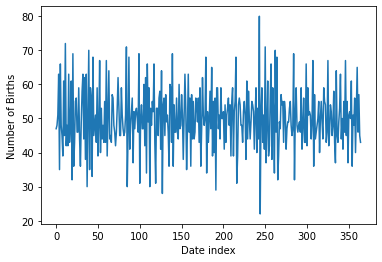

In [27]:
plt.plot(data.index, data.births)
plt.xlabel('Date index')
plt.ylabel('Number of Births')

Text(0, 0.5, 'ACF')

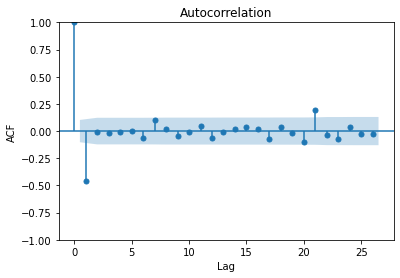

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.births)
plt.xlabel('Lag')
plt.ylabel('ACF')

/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0, 0.5, 'PACF')

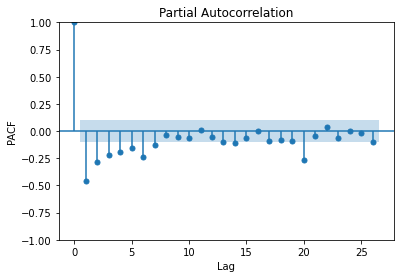

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data.births)
plt.xlabel('Lag')
plt.ylabel('PACF')

In [16]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data.births, order = (0,0,1))
ar = model.fit()
print(ar.summary())

                               SARIMAX Results                                
Dep. Variable:                 births   No. Observations:                  365
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1231.676
Date:                Sun, 27 Nov 2022   AIC                           2469.352
Time:                        11:48:52   BIC                           2481.052
Sample:                             0   HQIC                          2474.002
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0152      0.020   2499.466      0.000      49.976      50.054
ma.L1         -0.9525      0.017    -55.884      0.000      -0.986      -0.919
sigma2        49.6261      3.478     14.270      0.0

Text(0, 0.5, 'Residuals')

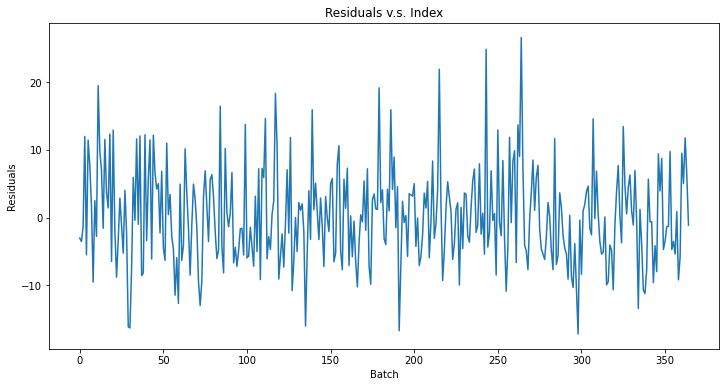

In [17]:
residual = ar.resid
plt.figure(figsize=(12,6))
plt.plot(data.index, residual)
plt.title('Residuals v.s. Index')
plt.xlabel('Batch')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

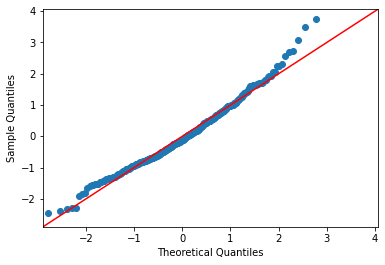

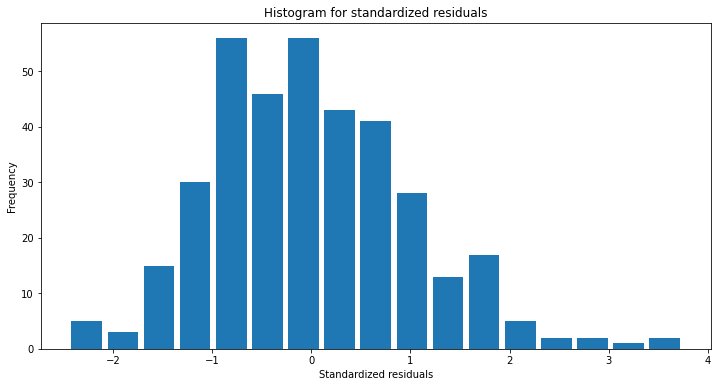

In [18]:
from sklearn.preprocessing import scale
import statsmodels.api as sm
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

Text(0, 0.5, 'ACF')

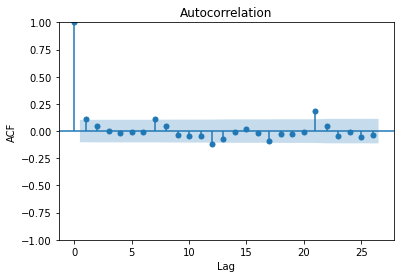

In [19]:
plot_acf(residual)
plt.xlabel('Lag')
plt.ylabel('ACF')

In [20]:
ar.forecast(30)

365    51.067248
366    50.015221
367    50.015221
368    50.015221
369    50.015221
370    50.015221
371    50.015221
372    50.015221
373    50.015221
374    50.015221
375    50.015221
376    50.015221
377    50.015221
378    50.015221
379    50.015221
380    50.015221
381    50.015221
382    50.015221
383    50.015221
384    50.015221
385    50.015221
386    50.015221
387    50.015221
388    50.015221
389    50.015221
390    50.015221
391    50.015221
392    50.015221
393    50.015221
394    50.015221
Name: predicted_mean, dtype: float64

# Model 2: ARMA 1,1:

In [22]:
model = ARIMA(data.births, order = (1,0,1))
ar = model.fit()
print(ar.summary())

                               SARIMAX Results                                
Dep. Variable:                 births   No. Observations:                  365
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1228.983
Date:                Sun, 27 Nov 2022   AIC                           2465.965
Time:                        20:03:16   BIC                           2481.565
Sample:                             0   HQIC                          2472.165
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0149      0.016   3175.367      0.000      49.984      50.046
ar.L1          0.1289      0.059      2.203      0.028       0.014       0.244
ma.L1         -0.9690      0.016    -61.943      0.0

Text(0, 0.5, 'Residuals')

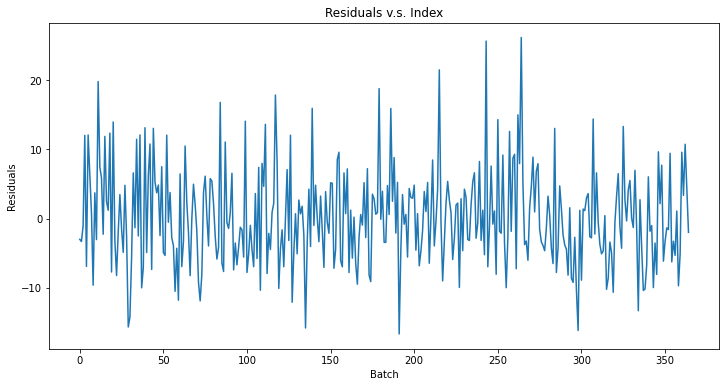

In [23]:
residual = ar.resid
plt.figure(figsize=(12,6))
plt.plot(data.index, residual)
plt.title('Residuals v.s. Index')
plt.xlabel('Batch')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

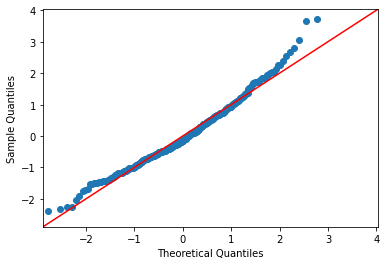

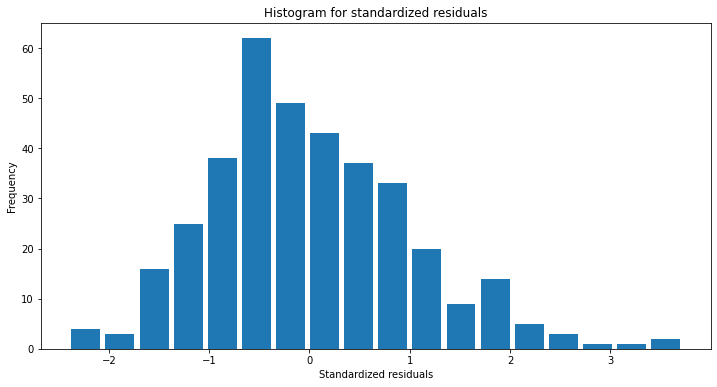

In [24]:
from sklearn.preprocessing import scale
import statsmodels.api as sm
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

Text(0, 0.5, 'ACF')

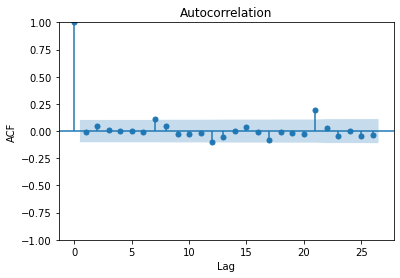

In [25]:
plot_acf(residual)
plt.xlabel('Lag')
plt.ylabel('ACF')